# Problem #1

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
trff_all= pd.read_csv('network_backup_dataset.csv')

In [6]:
trff_all = trff_all.replace({'Day of Week': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}})
trff_all['Day #'] = (trff_all['Week #']-1)*7+trff_all['Day of Week']
trff_20 = trff_all[trff_all['Day #']<=20]

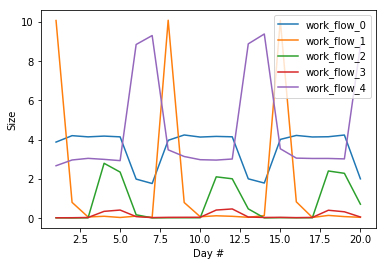

In [7]:
for Workflow, group in trff_20[['Work-Flow-ID','Day #', 'Size of Backup (GB)']].groupby('Work-Flow-ID'):
    size = list()
    day = list()
    for Day, Size in group.groupby('Day #'):
        size.append(sum(Size['Size of Backup (GB)']))
        day.append(Day)
    plt.plot(day, size, label = Workflow)
plt.xlabel('Day #')
plt.ylabel('Size')
plt.legend(loc = 'best')
plt.show()


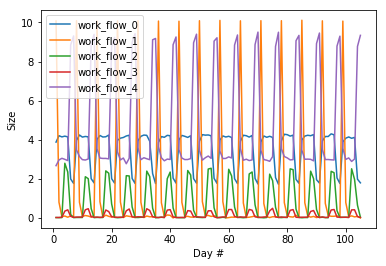

In [8]:
trff_105 = trff_all[trff_all['Day #']<=105]
for Workflow, group in trff_105[['Work-Flow-ID','Day #', 'Size of Backup (GB)']].groupby('Work-Flow-ID'):
    size = list()
    day = list()
    for Day, Size in group.groupby('Day #'):
        size.append(sum(Size['Size of Backup (GB)']))
        day.append(Day)
    plt.plot(day, size,label = Workflow)
plt.xlabel('Day #')
plt.ylabel('Size')
plt.legend(loc = 'best')
plt.show()

# Problem #2

## c

In [9]:
trff_all= pd.read_csv('network_backup_dataset.csv')
trff_scale_encode = trff_all.replace({'Day of Week': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
                                                      'Friday': 5, 'Saturday': 6, 'Sunday': 7},
                  'Work-Flow-ID': {'work_flow_0': 0, 'work_flow_1': 1, 'work_flow_2': 2, 'work_flow_3': 3,
                                   'work_flow_4': 4},
                  'File Name': {'File_0': 0, 'File_1': 1, 'File_2': 2, 'File_3': 3, 'File_4': 4, 'File_5': 5,
                                'File_6': 6, 'File_7': 7, 'File_8': 8, 'File_9': 9, 'File_10': 10, 'File_11': 11,
                                'File_12': 12, 'File_13': 13, 'File_14': 14, 'File_15': 15, 'File_16': 16,
                                'File_17': 17, 'File_18': 18, 'File_19': 19, 'File_20': 20, 'File_21': 21,
                                'File_22': 22, 'File_23': 23, 'File_24': 24, 'File_25': 25, 'File_26': 26,
                                'File_27': 27, 'File_28': 28, 'File_29': 29, }})

In [10]:
from sklearn import linear_model, metrics
from sklearn.model_selection import cross_val_predict, cross_val_score
import numpy as np
from sklearn.model_selection import KFold

from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn_pandas import DataFrameMapper

In [11]:
enc = OneHotEncoder()
mapper = DataFrameMapper([
    (['Week #'], enc),
    (['Day of Week'], enc),
    (['Backup Start Time - Hour of Day'], enc),
    (['Work-Flow-ID'], enc), 
    (['File Name'], enc),
    (['Size of Backup (GB)'],None),
    (['Backup Time (hour)'],None)])
trff_OH = mapper.fit_transform(trff_scale_encode)
size_index = trff_OH.shape[1]-2

In [12]:
def nn_hid_test(hidden_size,activation_in,trff_OH,size_index):
    rmse_testing = list()
    rmse_training = list()
    clf = MLPRegressor(activation=activation_in,alpha=0.0001,learning_rate='adaptive',hidden_layer_sizes=(hidden_size,), random_state=42)
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    kf.get_n_splits(trff_OH)
    for train_index, test_index in kf.split(trff_OH):
        variables_train, variables_test = trff_OH[train_index,0:size_index], trff_OH[test_index,0:size_index]
        backup_size_train, backup_size_test = trff_OH[train_index,size_index], trff_OH[test_index,size_index]
        clf.fit(variables_train, backup_size_train)
        backup_size_test_pred = clf.predict(variables_test)
        RMSE_testing = np.sqrt(metrics.mean_squared_error(backup_size_test, backup_size_test_pred))
        rmse_testing.append(RMSE_testing)
        backup_size_train_pred = clf.predict(variables_train)
        RMSE_training = np.sqrt(metrics.mean_squared_error(backup_size_train, backup_size_train_pred))
        rmse_training.append(RMSE_training)
    return np.mean(rmse_training),np.mean(rmse_testing)

0.088023994472
0.0731168441471
0.0234587937501
0.0213670201519
0.0218033885542
0.0211811141913
0.0196390625496


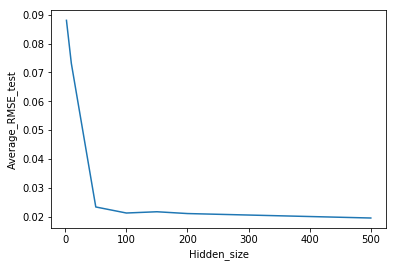

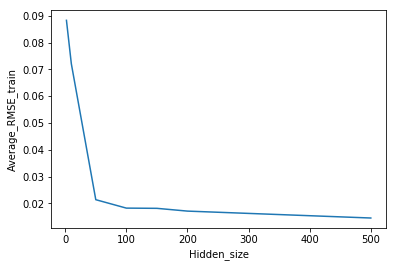

In [13]:
hidden_sizes = [2,10,50,100,150,200,500]
#hidden_sizes = [10,20,50]
rmse_test_aver = []
rmse_train_aver = []

hdl1 = plt.figure()
ax1 = hdl1.add_subplot(111)
plt.xlabel('Hidden_size')
plt.ylabel('Average_RMSE_test')

hdl1_1 = plt.figure()
ax1_1 = hdl1_1.add_subplot(111)  
plt.xlabel('Hidden_size')
plt.ylabel('Average_RMSE_train')

for hidden_size in hidden_sizes:
    temp_aver_train,temp_aver_test = nn_hid_test(hidden_size,'relu',trff_OH,size_index)
    print(temp_aver_test)
    rmse_train_aver.append(temp_aver_train)
    rmse_test_aver.append(temp_aver_test)
ax1.plot(hidden_sizes,rmse_test_aver)
ax1_1.plot(hidden_sizes,rmse_train_aver)

0.0889289631276
0.0883526645667
0.0887248221128
0.0885115957074
0.0888918263576
0.0895020939255
0.0902813974553


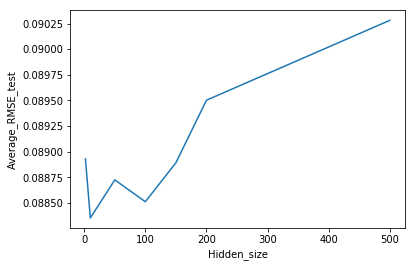

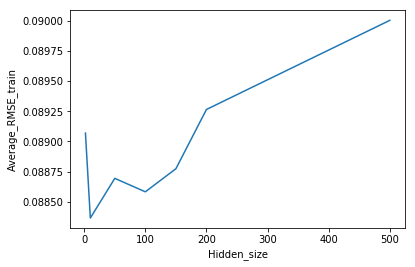

In [14]:
hidden_sizes = [2,10,50,100,150,200,500]
rmse_test_aver = []
rmse_train_aver = []

hdl1 = plt.figure()
ax1 = hdl1.add_subplot(111)
plt.xlabel('Hidden_size')
plt.ylabel('Average_RMSE_test')

hdl1_1 = plt.figure()
ax1_1 = hdl1_1.add_subplot(111)  
plt.xlabel('Hidden_size')
plt.ylabel('Average_RMSE_train')

for hidden_size in hidden_sizes:
    temp_aver_train,temp_aver_test = nn_hid_test(hidden_size,'logistic',trff_OH,size_index)
    print(temp_aver_test)
    rmse_train_aver.append(temp_aver_train)
    rmse_test_aver.append(temp_aver_test)
ax1.plot(hidden_sizes,rmse_test_aver)
ax1_1.plot(hidden_sizes,rmse_train_aver)

0.0885128863289
0.0892335161691
0.0883945014892
0.0889808947491
0.0881695980215
0.0900728094566
0.0924844624073


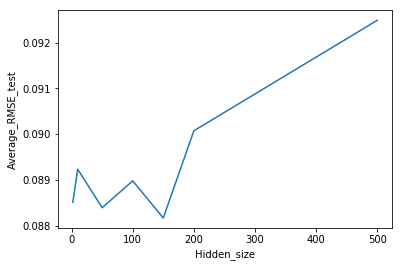

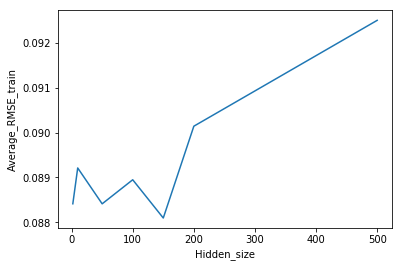

In [34]:
hidden_sizes = [2,10,50,100,150,200,500]
rmse_test_aver = []
rmse_train_aver = []


hdl1 = plt.figure()
ax1 = hdl1.add_subplot(111)
plt.xlabel('Hidden_size')
plt.ylabel('Average_RMSE_test')

hdl1_1 = plt.figure()
ax1_1 = hdl1_1.add_subplot(111)  
plt.xlabel('Hidden_size')
plt.ylabel('Average_RMSE_train')

for hidden_size in hidden_sizes:
    temp_aver_train,temp_aver_test = nn_hid_test(hidden_size,'tanh',trff_OH,size_index)
    print(temp_aver_test)
    rmse_train_aver.append(temp_aver_train)
    rmse_test_aver.append(temp_aver_test)
ax1.plot(hidden_sizes,rmse_test_aver)
ax1_1.plot(hidden_sizes,rmse_train_aver)

# d

In [23]:
from sklearn import linear_model, metrics
from sklearn.model_selection import cross_val_predict, cross_val_score
import numpy as np
from sklearn.model_selection import KFold


In [24]:
trff_all= pd.read_csv('network_backup_dataset.csv')
trff_scale_encode = trff_all.replace({'Day of Week': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4,
                                                      'Friday': 5, 'Saturday': 6, 'Sunday': 7},
                  'Work-Flow-ID': {'work_flow_0': 0, 'work_flow_1': 1, 'work_flow_2': 2, 'work_flow_3': 3,
                                   'work_flow_4': 4},
                  'File Name': {'File_0': 0, 'File_1': 1, 'File_2': 2, 'File_3': 3, 'File_4': 4, 'File_5': 5,
                                'File_6': 6, 'File_7': 7, 'File_8': 8, 'File_9': 9, 'File_10': 10, 'File_11': 11,
                                'File_12': 12, 'File_13': 13, 'File_14': 14, 'File_15': 15, 'File_16': 16,
                                'File_17': 17, 'File_18': 18, 'File_19': 19, 'File_20': 20, 'File_21': 21,
                                'File_22': 22, 'File_23': 23, 'File_24': 24, 'File_25': 25, 'File_26': 26,
                                'File_27': 27, 'File_28': 28, 'File_29': 29, }})

In [25]:
work_flow_0 = trff_scale_encode.loc[trff_scale_encode['Work-Flow-ID']==0]
work_flow_1 = trff_scale_encode.loc[trff_scale_encode['Work-Flow-ID']==1]
work_flow_2 = trff_scale_encode.loc[trff_scale_encode['Work-Flow-ID']==2]
work_flow_3 = trff_scale_encode.loc[trff_scale_encode['Work-Flow-ID']==3]
work_flow_4 = trff_scale_encode.loc[trff_scale_encode['Work-Flow-ID']==4]

In [26]:
def seperate_check(work_flow_in,model,verbose = True, plot_image=True):
    variables = work_flow_in[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']]
    backup_size = work_flow_in['Size of Backup (GB)']
    rmse_testing = list()
    rmse_training = list()
    actual_values = list()
    fitted_values = list()
    residuals = list()
    kf = KFold(n_splits=10, random_state=42, shuffle=False)
    for train_index, test_index in kf.split(work_flow_in):
        variables_train, variables_test = variables.iloc[train_index], variables.iloc[test_index]
        backup_size_train, backup_size_test = backup_size.iloc[train_index], backup_size.iloc[test_index]
        model.fit(variables_train, backup_size_train)
        # Get the Test RMSE and the predect size of testset
        backup_size_test_pred = model.predict(variables_test)
        temp_rmse_testing = np.sqrt(metrics.mean_squared_error(backup_size_test, backup_size_test_pred))
        rmse_testing.append(temp_rmse_testing)
        # Get the Training RMSE and the predect size of trainset
        backup_size_train_pred = model.predict(variables_train)
        temp_rmse_training = np.sqrt(metrics.mean_squared_error(backup_size_train, backup_size_train_pred))
        rmse_training.append(temp_rmse_training)
    
        for i in range(len(backup_size_test)):
            backup_size_test = list(backup_size_test)
            actual_values.append(backup_size_test[i])
            fitted_values.append(backup_size_test_pred[i])
            residuals.append(backup_size_test[i]-backup_size_test_pred[i])
        if(verbose):
            print('The Training RMSE is %.4f' % temp_rmse_training)
            print('The Test RMSE is %.4f' % temp_rmse_testing)
            print('-'*30)
    if(plot_image):
        plot_fitted_value(actual_values, fitted_values, 'Scaler Encoding - fitted v.s. actual')
        plot_residuals(fitted_values, residuals, 'Scaler Encoding - residuals v.s. fitted')
    print('The average Training RMSE is %.4f' % np.mean(rmse_training))
    print('The average Test RMSE is %.4f' % np.mean(rmse_testing))
    return np.mean(rmse_training),np.mean(rmse_testing)

In [27]:
def plot_fitted_value(actual_values, fitted_values, feature):
    x = len(actual_values)
    x_index = np.array(range(x)) + 1
    plt.scatter(x_index, actual_values, s=5, c='red',label = 'actual')
    plt.scatter(x_index, fitted_values, s=5, c='skyblue',label = 'fitted')
    #plt.scatter(x_index, actual_values, s=10, c='red',alpha=0.3)
    #plt.plot([0, 1], [0, 1], 'y--')
    plt.xlabel('data points')
    plt.ylabel('Actual Vs. Fitted values')
    plt.title(feature)
    plt.legend(loc = 'upper right',bbox_to_anchor = (1,0.9))
    plt.show()

def plot_residuals(fitted_values, residuals, feature):
    x = len(fitted_values)
    x_index = np.array(range(x)) + 1
    plt.scatter(x_index, residuals, s=5, c='yellow',label = 'residual')
    plt.scatter(x_index, fitted_values, s=5, c='gray',label = 'fitted')
    #plt.plot([0, 1], [0, 0], 'y--')
    plt.xlabel('data points')
    plt.ylabel('Residuals Vs. fitted_values')
    plt.title(feature)
    plt.legend(loc = 'upper right',bbox_to_anchor = (1,0.9))
    plt.show()
    
def plot_rmse_test_avg(rmse_testing_avg):
    plt.plot(range(1,len(rmse_testing_avg)+1), rmse_testing_avg, 'r', alpha = 0.4, label='test')
    plt.ylabel('Average Test RMSE')
    plt.xlabel('Combinations')
    plt.show()

def plot_rmse_training_avg(rmse_training_avg):
    plt.plot(range(1,len(rmse_training_avg)+1), rmse_training_avg, 'r', alpha = 0.4, label='training')
    plt.ylabel('Average Training RMSE')
    plt.xlabel('Combinations')
    plt.show()

The Training RMSE is 0.0357
The Test RMSE is 0.0371
------------------------------
The Training RMSE is 0.0359
The Test RMSE is 0.0349
------------------------------
The Training RMSE is 0.0357
The Test RMSE is 0.0369
------------------------------
The Training RMSE is 0.0357
The Test RMSE is 0.0370
------------------------------
The Training RMSE is 0.0358
The Test RMSE is 0.0364
------------------------------
The Training RMSE is 0.0360
The Test RMSE is 0.0342
------------------------------
The Training RMSE is 0.0357
The Test RMSE is 0.0374
------------------------------
The Training RMSE is 0.0360
The Test RMSE is 0.0342
------------------------------
The Training RMSE is 0.0358
The Test RMSE is 0.0366
------------------------------
The Training RMSE is 0.0360
The Test RMSE is 0.0341
------------------------------


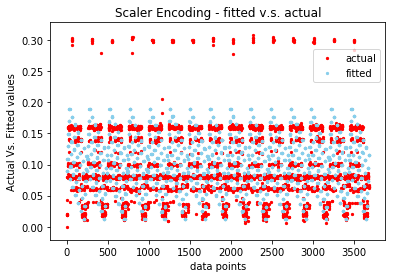

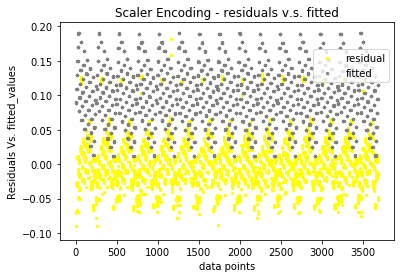

The average Training RMSE is 0.0358
The average Test RMSE is 0.0359


In [28]:
lr = linear_model.LinearRegression()
average_train,average_test = seperate_check(work_flow_0,lr)

The Training RMSE is 0.1462
The Test RMSE is 0.1704
------------------------------
The Training RMSE is 0.1513
The Test RMSE is 0.1238
------------------------------
The Training RMSE is 0.1462
The Test RMSE is 0.1702
------------------------------
The Training RMSE is 0.1513
The Test RMSE is 0.1237
------------------------------
The Training RMSE is 0.1462
The Test RMSE is 0.1701
------------------------------
The Training RMSE is 0.1513
The Test RMSE is 0.1242
------------------------------
The Training RMSE is 0.1462
The Test RMSE is 0.1704
------------------------------
The Training RMSE is 0.1513
The Test RMSE is 0.1238
------------------------------
The Training RMSE is 0.1462
The Test RMSE is 0.1704
------------------------------
The Training RMSE is 0.1513
The Test RMSE is 0.1239
------------------------------


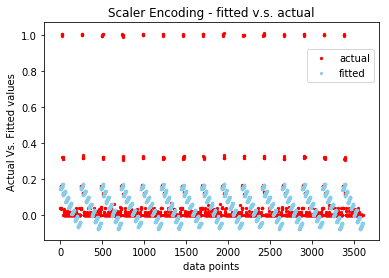

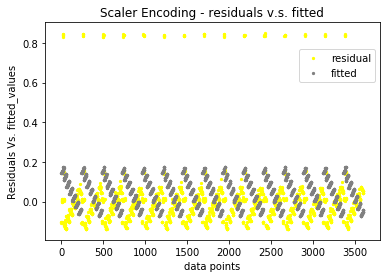

The average Training RMSE is 0.1487
The average Test RMSE is 0.1471


In [29]:
average_train,average_test = seperate_check(work_flow_1,lr)

The Training RMSE is 0.0436
The Test RMSE is 0.0365
------------------------------
The Training RMSE is 0.0423
The Test RMSE is 0.0484
------------------------------
The Training RMSE is 0.0437
The Test RMSE is 0.0356
------------------------------
The Training RMSE is 0.0425
The Test RMSE is 0.0466
------------------------------
The Training RMSE is 0.0437
The Test RMSE is 0.0356
------------------------------
The Training RMSE is 0.0417
The Test RMSE is 0.0528
------------------------------
The Training RMSE is 0.0434
The Test RMSE is 0.0384
------------------------------
The Training RMSE is 0.0424
The Test RMSE is 0.0476
------------------------------
The Training RMSE is 0.0437
The Test RMSE is 0.0355
------------------------------
The Training RMSE is 0.0422
The Test RMSE is 0.0488
------------------------------


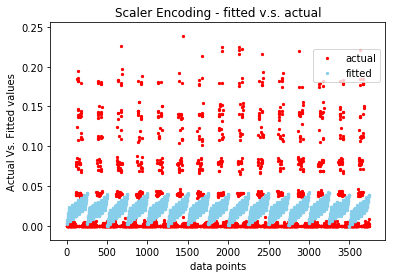

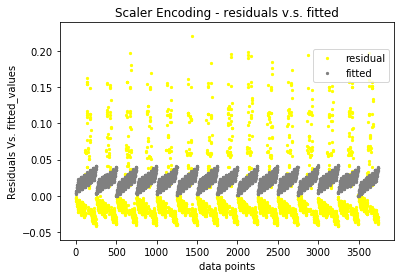

The average Training RMSE is 0.0429
The average Test RMSE is 0.0426


In [30]:
average_train,average_test = seperate_check(work_flow_2,lr)

The Training RMSE is 0.0074
The Test RMSE is 0.0060
------------------------------
The Training RMSE is 0.0072
The Test RMSE is 0.0078
------------------------------
The Training RMSE is 0.0073
The Test RMSE is 0.0064
------------------------------
The Training RMSE is 0.0071
The Test RMSE is 0.0082
------------------------------
The Training RMSE is 0.0074
The Test RMSE is 0.0057
------------------------------
The Training RMSE is 0.0071
The Test RMSE is 0.0083
------------------------------
The Training RMSE is 0.0073
The Test RMSE is 0.0066
------------------------------
The Training RMSE is 0.0071
The Test RMSE is 0.0086
------------------------------
The Training RMSE is 0.0073
The Test RMSE is 0.0063
------------------------------
The Training RMSE is 0.0072
The Test RMSE is 0.0080
------------------------------


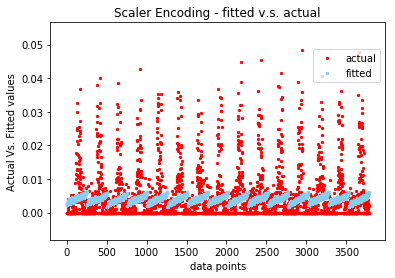

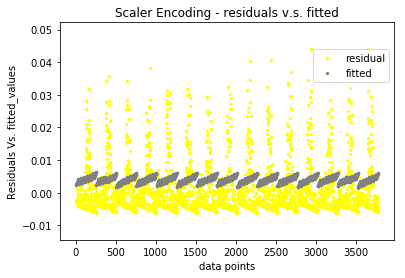

The average Training RMSE is 0.0072
The average Test RMSE is 0.0072


In [31]:
average_train,average_test = seperate_check(work_flow_3,lr)

The Training RMSE is 0.0872
The Test RMSE is 0.0739
------------------------------
The Training RMSE is 0.0847
The Test RMSE is 0.0960
------------------------------
The Training RMSE is 0.0871
The Test RMSE is 0.0745
------------------------------
The Training RMSE is 0.0846
The Test RMSE is 0.0971
------------------------------
The Training RMSE is 0.0870
The Test RMSE is 0.0755
------------------------------
The Training RMSE is 0.0849
The Test RMSE is 0.0946
------------------------------
The Training RMSE is 0.0870
The Test RMSE is 0.0752
------------------------------
The Training RMSE is 0.0848
The Test RMSE is 0.0958
------------------------------
The Training RMSE is 0.0871
The Test RMSE is 0.0749
------------------------------
The Training RMSE is 0.0848
The Test RMSE is 0.0957
------------------------------


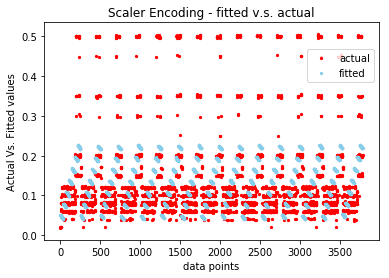

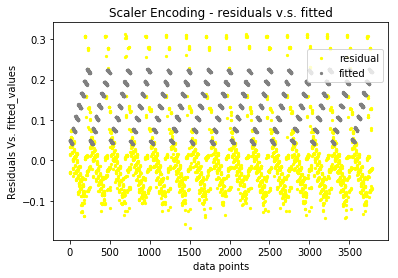

The average Training RMSE is 0.0859
The average Test RMSE is 0.0853


In [32]:
average_train,average_test = seperate_check(work_flow_4,lr)

## ii

In [20]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

The average Training RMSE is 0.0295
The average Test RMSE is 0.0295
The average Training RMSE is 0.0263
The average Test RMSE is 0.0263
The average Training RMSE is 0.0250
The average Test RMSE is 0.0251
The average Training RMSE is 0.0182
The average Test RMSE is 0.0187
The average Training RMSE is 0.0104
The average Test RMSE is 0.0124
The average Training RMSE is 0.0091
The average Test RMSE is 0.0114
The average Training RMSE is 0.0080
The average Test RMSE is 0.0141
The average Training RMSE is 0.0076
The average Test RMSE is 0.0178
The average Training RMSE is 0.0073
The average Test RMSE is 0.0407
The average Training RMSE is 0.0137
The average Test RMSE is 0.0692
The average Training RMSE is 0.0173
The average Test RMSE is 0.2032
The average Training RMSE is 0.0209
The average Test RMSE is 0.3483
The average Training RMSE is 0.0104
The average Test RMSE is 0.2966


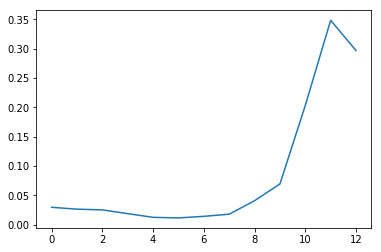

In [24]:
#work_flow_0
ploy_input = [2,6,10,14,18]
lr = linear_model.LinearRegression()
test_rmse_aver = []
train_rmse_aver = []
for i in range(2,15):
    ply = PolynomialFeatures(i)
    model_in = make_pipeline(ply,lr)
    temp_train,temp_test = seperate_check(work_flow_0,model_in,verbose=False,plot_image=False)
    train_rmse_aver.append(temp_train)
    test_rmse_aver.append(temp_test)
plt.plot(test_rmse_aver)

Best polynomial parameter is 7 with min_test_rmse = 0.0114

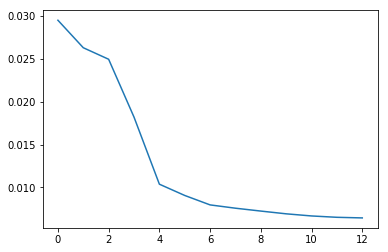

In [114]:
#work_flow_0 training RMSE
plt.plot(train_rmse_aver)

The average Training RMSE is 0.1298
The average Test RMSE is 0.1286
The average Training RMSE is 0.1111
The average Test RMSE is 0.1103
The average Training RMSE is 0.0894
The average Test RMSE is 0.0887
The average Training RMSE is 0.0656
The average Test RMSE is 0.0657
The average Training RMSE is 0.0425
The average Test RMSE is 0.0428
The average Training RMSE is 0.0208
The average Test RMSE is 0.0224
The average Training RMSE is 0.0055
The average Test RMSE is 0.0112
The average Training RMSE is 0.0052
The average Test RMSE is 0.0240
The average Training RMSE is 0.0050
The average Test RMSE is 0.0354
The average Training RMSE is 0.0046
The average Test RMSE is 0.1285


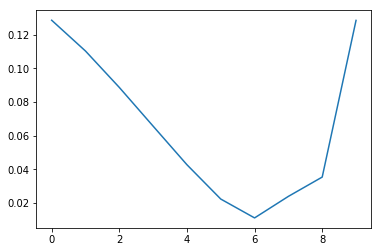

In [111]:
#work_flow_1
poly_input = [2,3,4,5,6,7,9,10,11,13]
test_rmse_aver_1 = []
train_rmse_aver_1 = []
for i in poly_input:
    ply = PolynomialFeatures(i)
    model_in = make_pipeline(ply,lr)
    temp_train,temp_test = seperate_check(work_flow_1,model_in,verbose=False,plot_image=False)
    train_rmse_aver_1.append(temp_train)
    test_rmse_aver_1.append(temp_test)
plt.plot(test_rmse_aver_1)

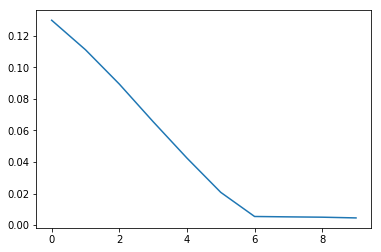

In [112]:
#work_flow_1 training RMSE
plt.plot(train_rmse_aver_1)

The average Training RMSE is 0.0385
The average Test RMSE is 0.0386
The average Training RMSE is 0.0347
The average Test RMSE is 0.0348
The average Training RMSE is 0.0319
The average Test RMSE is 0.0327
The average Training RMSE is 0.0264
The average Test RMSE is 0.0274
The average Training RMSE is 0.0219
The average Test RMSE is 0.0247
The average Training RMSE is 0.0210
The average Test RMSE is 0.0357
The average Training RMSE is 0.0178
The average Test RMSE is 0.0435
The average Training RMSE is 0.0172
The average Test RMSE is 0.0761
The average Training RMSE is 0.0159
The average Test RMSE is 0.4249


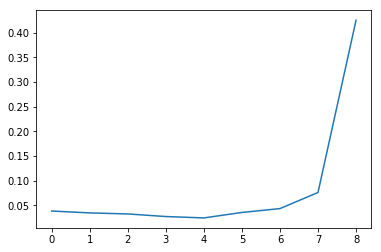

In [27]:
#work_flow_2
poly_input = [2,3,4,5,6,7,9,10,12]
test_rmse_aver_2 = []
train_rmse_aver_2 = []
for i in poly_input:
    ply = PolynomialFeatures(i)
    model_in = make_pipeline(ply,lr)
    temp_train,temp_test = seperate_check(work_flow_2,model_in,verbose=False,plot_image=False)
    train_rmse_aver_2.append(temp_train)
    test_rmse_aver_2.append(temp_test)
plt.plot(test_rmse_aver_2)

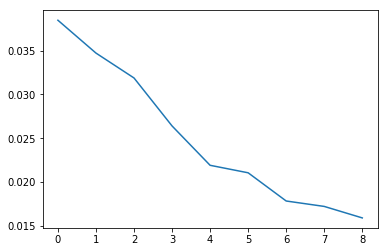

In [28]:
#work_flow_2 training RMSE
plt.plot(train_rmse_aver_2)

The average Training RMSE is 0.0064
The average Test RMSE is 0.0064
The average Training RMSE is 0.0060
The average Test RMSE is 0.0060
The average Training RMSE is 0.0056
The average Test RMSE is 0.0057
The average Training RMSE is 0.0049
The average Test RMSE is 0.0050
The average Training RMSE is 0.0046
The average Test RMSE is 0.0056
The average Training RMSE is 0.0046
The average Test RMSE is 0.0080
The average Training RMSE is 0.0044
The average Test RMSE is 0.0126
The average Training RMSE is 0.0041
The average Test RMSE is 0.0307
The average Training RMSE is 0.0037
The average Test RMSE is 0.0769


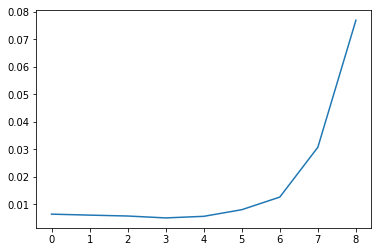

In [22]:
#work_flow_3
poly_input = [2,3,4,5,6,7,9,10,12]
test_rmse_aver_3 = []
train_rmse_aver_3 = []
for i in poly_input:
    ply = PolynomialFeatures(i)
    model_in = make_pipeline(ply,lr)
    temp_train,temp_test = seperate_check(work_flow_3,model_in,verbose=False,plot_image=False)
    train_rmse_aver_3.append(temp_train)
    test_rmse_aver_3.append(temp_test)
plt.plot(test_rmse_aver_3)

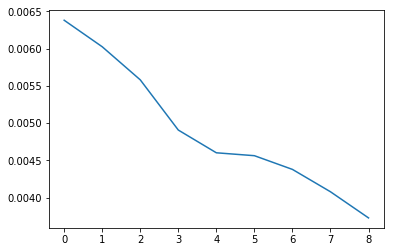

In [25]:
#work_flow_3 training RMSE
plt.plot(train_rmse_aver_3)

The average Training RMSE is 0.0692
The average Test RMSE is 0.0688
The average Training RMSE is 0.0667
The average Test RMSE is 0.0679
The average Training RMSE is 0.0631
The average Test RMSE is 0.0724
The average Training RMSE is 0.0453
The average Test RMSE is 0.0527
The average Training RMSE is 0.0371
The average Test RMSE is 0.0535
The average Training RMSE is 0.0265
The average Test RMSE is 0.0550
The average Training RMSE is 0.0235
The average Test RMSE is 0.1007
The average Training RMSE is 0.0152
The average Test RMSE is 0.1772
The average Training RMSE is 0.0134
The average Test RMSE is 0.6093


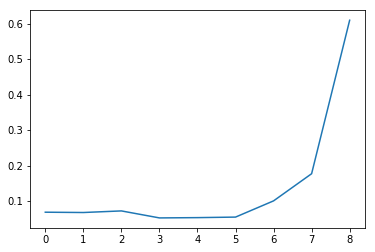

In [23]:
#work_flow_4
poly_input = [2,3,4,5,6,7,9,10,12]
test_rmse_aver_4 = []
train_rmse_aver_4 = []
for i in poly_input:
    ply = PolynomialFeatures(i)
    model_in = make_pipeline(ply,lr)
    temp_train,temp_test = seperate_check(work_flow_4,model_in,verbose=False,plot_image=False)
    train_rmse_aver_4.append(temp_train)
    test_rmse_aver_4.append(temp_test)
plt.plot(test_rmse_aver_4)

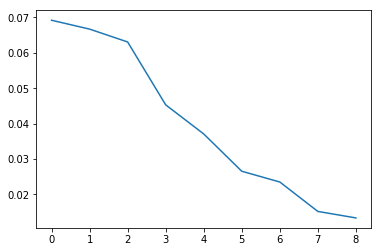

In [26]:
#work_flow_4 training RMSE
plt.plot(train_rmse_aver_4)

The Training RMSE is 0.0114
The Test RMSE is 20.1827
------------------------------
The Training RMSE is 0.0110
The Test RMSE is 1.7680
------------------------------
The Training RMSE is 0.0112
The Test RMSE is 0.0734
------------------------------
The Training RMSE is 0.0106
The Test RMSE is 0.0392
------------------------------
The Training RMSE is 0.0113
The Test RMSE is 0.0220
------------------------------
The Training RMSE is 0.0109
The Test RMSE is 0.0276
------------------------------
The Training RMSE is 0.0113
The Test RMSE is 0.0275
------------------------------
The Training RMSE is 0.0107
The Test RMSE is 0.1464
------------------------------
The Training RMSE is 0.0111
The Test RMSE is 2.1170
------------------------------
The Training RMSE is 0.0111
The Test RMSE is 59.9007
------------------------------


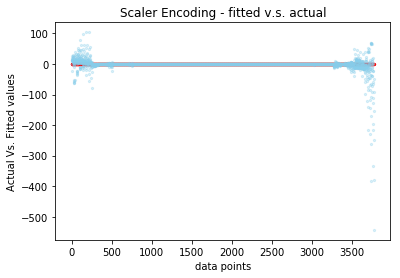

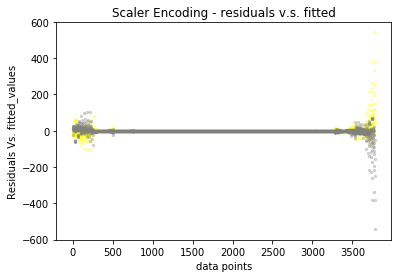

The average Training RMSE is 0.0111
The average Test RMSE is 8.4305


(0.011058145868844651, 8.430462962530342)

In [96]:
#example with parameter degree = 18
ply = PolynomialFeatures(18)
model_in = make_pipeline(ply,lr)
seperate_check(work_flow_4,model_in)

# e

In [107]:
from sklearn.neighbors import KNeighborsRegressor

The average Training RMSE is 0.0289
The average Test RMSE is 0.0335
The average Training RMSE is 0.0300
The average Test RMSE is 0.0359
The average Training RMSE is 0.0284
The average Test RMSE is 0.0371
The average Training RMSE is 0.0270
The average Test RMSE is 0.0427
The average Training RMSE is 0.0284
The average Test RMSE is 0.0472
The average Training RMSE is 0.0324
The average Test RMSE is 0.0462
The average Training RMSE is 0.0363
The average Test RMSE is 0.0462
The average Training RMSE is 0.0394
The average Test RMSE is 0.0474
The average Training RMSE is 0.0414
The average Test RMSE is 0.0479
The average Training RMSE is 0.0433
The average Test RMSE is 0.0484
The average Training RMSE is 0.0451
The average Test RMSE is 0.0493
The average Training RMSE is 0.0462
The average Test RMSE is 0.0492


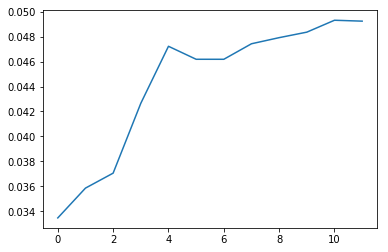

In [109]:
knn_p = [2,3,4,5,6,7,8,9,10,11,12,13]
train_rmse_aver_knn=[]
test_rmse_aver_knn = []
for i in knn_p:
    knn_f = KNeighborsRegressor(n_neighbors=i)
    temp_train,temp_test = seperate_check(trff_scale_encode,knn_f,verbose=False,plot_image=False)
    train_rmse_aver_knn.append(temp_train)
    test_rmse_aver_knn.append(temp_test)
plt.plot(test_rmse_aver_knn)